In [38]:
# importing the required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# turn of the warningsa
import warnings
warnings.filterwarnings('ignore')


In [39]:
df = pd.read_csv(r'C:\Users\sadeg\Desktop\code\project 1\Bengaluru_House_Data.csv')
df.head(5)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [40]:
df.shape

(13320, 9)

In [41]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [42]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [43]:
df2 = df.drop(['area_type','availability','society','balcony'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [44]:
df2.isnull().sum()
df3 = df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [45]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [46]:
# using lambda to split (another way to split)

# df3['new_size'] = df3['size'].apply(lambda x: x.split(' ')[0])

In [47]:
df3['bhk'] = df3['size'].str.split(' ',expand = True)[0]

In [48]:
df3.head()
df4 = df3.drop('size',axis = 'columns')
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [49]:
df4.bhk = df4.bhk.apply(lambda x:int(x))
df4.dtypes

location       object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [50]:
df4.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [51]:
# we want to see which kind of house actually has more than 10 bedrooms! (removing the ouitliers)
df4 [df4.bhk > 10]
# here we do not do anything, but later we will take a closer look at them

,location,total_sqft,bath,price,bhk
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11
4684,Munnekollal,2400,40.0,660.0,43
4916,1Channasandra,1250,15.0,125.0,14
6533,Mysore Road,2232,6.0,300.0,12
7979,1 Immadihalli,6000,12.0,150.0,11


In [52]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [53]:
# the below line can not be true as we have different kind of error in df4.total_sqft to remove: so we should write a function to includes all of them

# pd.DataFrame (df4 [df4['total_sqft'].str.contains('-')]['total_sqft'].str.split('-',expand = True).mean(axis =0))

In [54]:
#the function allow us to see which values need to be adjusted
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

# want to look at the valuse that are not I want in sqft column
df4 [~df4['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [55]:
# finding rows which are irregular to drop

def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return ( float (token[0]) + float(token[1]) ) * 0.5
    try:
        return float(x)
    except:
        return None
    

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.dropna(inplace=True)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [56]:
# manuaaly check on of the irregular values to see whether it is corrected or not?
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [57]:
df5 = df4.copy()
df5['price per sqft'] = (df5.price * 100000) / df5.total_sqft   # need this columns for outlier removal
df5.head()

,location,total_sqft,bath,price,bhk,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [58]:
# checking the data to see how many value I have as str. Since I want to use get dummies, having so many varaible means I will have many columns in my feature!!!

location_stats = df5.groupby('location')['location'].count()

In [59]:
loc_less_than_10 = location_stats [location_stats < 10]

In [60]:
# name all these locations as "the othwer"
df5.location = df5.location.apply(lambda x: 'the other' if x in loc_less_than_10 else x)
df5.location.value_counts()

the other               2757
Whitefield               532
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           264
                        ... 
Nagappa Reddy Layout      10
BTM 1st Stage             10
Basapura                  10
Kalkere                   10
Nagadevanahalli           10
Name: location, Length: 254, dtype: int64

In [61]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,the other,1020.0,6.0,370.00,6,36274.509804


In [62]:
# if the numbers of the bedrooms are more than a thershold, we should consider them as error. the thershold is considered based on the bhk and sqft

df5['sqft_per_bhk'] = df5['total_sqft'] / df5.bhk
df6 = df5[~ (df5.sqft_per_bhk < 300)]
df6.head()
df6.shape


(12456, 7)

In [63]:
# remove outlier (price per sqft) per location
def remove_ppsqft_outliers(df):
    df_final = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price per sqft'])
        sd = np.std(subdf['price per sqft'])
        selected_df = subdf [ (subdf['price per sqft'] > (m-sd)) & (subdf['price per sqft'] < (m+sd)) ]
        df_final = pd.concat([df_final,selected_df], ignore_index= True)
    return df_final


df7 = remove_ppsqft_outliers(df6)
df7.shape

(10226, 7)

In [64]:
df7.head(30)

,location,total_sqft,bath,price,bhk,price per sqft,sqft_per_bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000,416.666667
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000,625.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667,600.000000
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419,585.000000
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509,475.000000
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699,473.500000
6,Devarachikkanahalli,1130.0,2.0,36.0,2,3185.840708,565.000000
7,Devarachikkanahalli,1417.0,2.0,76.0,3,5363.443896,472.333333
8,Devarachikkanahalli,1230.0,2.0,58.0,2,4715.447154,615.000000
9,Devarachikkanahalli,1705.0,3.0,75.0,3,4398.826979,568.333333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


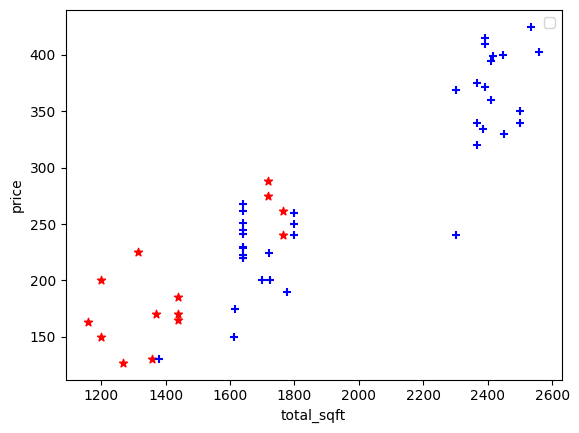

In [65]:
# must remove the outliers of 3bhk has price less than 2bhk in the same location with tha same sqft

# data visualization to see the outliers
def plot_2and3_bhk (df,location):
    bhk2 = df [((df['location'] == location ) & (df['bhk'] == 2))]
    bhk3 = df [((df['location'] == location ) & (df['bhk'] == 3))]
    plt.scatter(bhk2['total_sqft'],bhk2['price'], color = 'red', marker= '*')
    plt.scatter(bhk3['total_sqft'],bhk3['price'], color = 'blue', marker= '+')
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.legend()


plot_2and3_bhk(df7,'Rajaji Nagar') 
# this shows that in homes with the same location and sqft, we have some outliers that 2 bedroom are more expensive than 3 bedrooms.
# so we must remove these outkiers






In [103]:
i = 0
for location, location_df in df7.groupby('location'):
    print (location_df)
    i = i+1
    if i > 5:
        break

                location  total_sqft  bath  price  bhk  price per sqft  \
0    Devarachikkanahalli      1250.0   2.0   44.0    3     3520.000000   
1    Devarachikkanahalli      1250.0   2.0   40.0    2     3200.000000   
2    Devarachikkanahalli      1200.0   2.0   83.0    2     6916.666667   
3    Devarachikkanahalli      1170.0   2.0   40.0    2     3418.803419   
4    Devarachikkanahalli      1425.0   2.0   65.0    3     4561.403509   
5    Devarachikkanahalli       947.0   2.0   43.0    2     4540.654699   
6    Devarachikkanahalli      1130.0   2.0   36.0    2     3185.840708   
7    Devarachikkanahalli      1417.0   2.0   76.0    3     5363.443896   
8    Devarachikkanahalli      1230.0   2.0   58.0    2     4715.447154   
9    Devarachikkanahalli      1705.0   3.0   75.0    3     4398.826979   
10   Devarachikkanahalli      1116.0   2.0   47.0    2     4211.469534   
11   Devarachikkanahalli       991.0   2.0   40.0    2     4036.326942   
12   Devarachikkanahalli      1700.0  

In [67]:
# now we should detect the outliers and remove them

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price per sqft']),
                'std' : np.std(bhk_df['price per sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get (bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')


df8 = remove_bhk_outliers(df7)
df8.shape

(7380, 7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


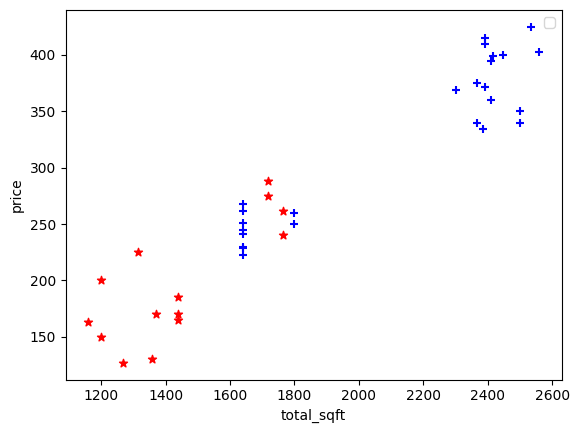

In [68]:
# making sure the outliers are removed
plot_2and3_bhk(df8,'Rajaji Nagar')

(array([ 566., 3620., 2302.,  452.,  252.,  115.,   43.,   18.,    7.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

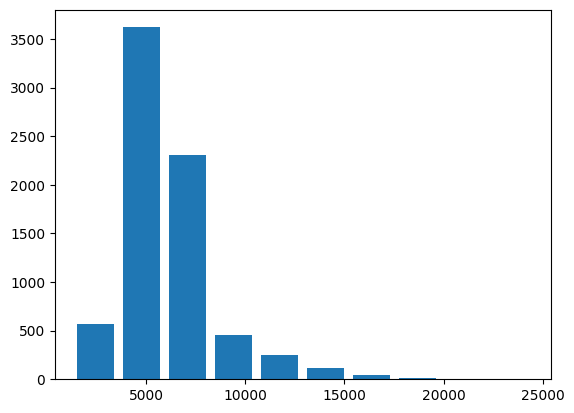

In [69]:
plt.hist(df8['price per sqft'],rwidth = 0.8)

In [70]:
# Bathroom num should not more than bedrooms + 2(outliers removal)
df9 = df8 [df8['bath'] < (df8['bhk'] + 2)]
df9.shape

(7302, 7)

In [71]:
df9.head()

,location,total_sqft,bath,price,bhk,price per sqft,sqft_per_bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000,625.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667,600.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419,585.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509,475.0
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699,473.5


In [72]:
df9.drop(['price per sqft','sqft_per_bhk'], axis = 'columns',inplace=True)
df9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [73]:
df10 = pd.get_dummies(df9,drop_first=True)

In [74]:
df10.head()

,total_sqft,bath,price,bhk,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_the other
1,1250.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df10.drop('price', axis='columns')
y = df10.price

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8904858285821712

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

CV = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y, cv=CV)


array([0.84384221, 0.82909644, 0.83378618, 0.84849956, 0.81198277])

In [79]:
# Function to compare different ML algorithms

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



def find_best_model_using_GridSearchCV (X,y):

    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'n_jobs' : [2 , 5]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1 , 2],
                'selection' : ['random' , 'cyclic']
            }
        },
        'decision_tree' : {
           'model' : DecisionTreeRegressor(),
           'params' : {
               'criterion' : ['mse' , 'friedman_mse'],
               'splitter' : ['best' , 'random']
           }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])


In [80]:
find_best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.833441,{'n_jobs': 2}
1,Lasso,0.694068,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743287,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [81]:
# Since we used dummies, we must generate X (features) for prediction

def predict_price (total_sqft,	bath,	location,	bhk):
    
    loc = 'location_'+location
    loc_indice = np.where (X.columns == loc)[0][0]
    
    feature = np.zeros(len(X.columns))
    feature[0] = total_sqft
    feature[1] = bath
    feature[3] = bhk
    if loc_indice >= 0:
        feature[loc_indice] = 1

    return model.predict([feature])[0]
    
    

In [82]:
# just one example to see how it works
predict_price(1250,3,'1st Block Jayanagar',4)

221.77514330478186

In [83]:
# Saving the model
import pickle
with open('my_tranied_model.pickle','wb') as f:
    pickle.dump(model,f)



# Saving Jason (columns names (locations))
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))